# Handwritten Digits Recognition
    Image classification based on salient features, the images of handwritten single digits between 0 and 9.                       The task is to classify a given image of a handwritten digit into one of 10 classes represting integer                         values from 0 to 9.

# Importing libraries

In [5]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading-"MNIST dataset"
     Containing training samples=60,000 , testing samples=10,000
     TensorFlow already contain MNIST data set which can be loaded using Keras

In [8]:
mnist=tf.keras.datasets.mnist #This is basically handwritten characters based on 28*28 images of 0 to 9
#mnist-->Modified National Institute of Standards and Technology

     After loading the MNIST data, Divide into train and test  datasets

In [9]:
# unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
x_train.shape

(60000, 28, 28)

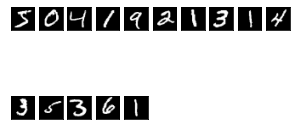

In [11]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax=plt.imshow(np.squeeze(x_train[i]),cmap='gray')
    
    

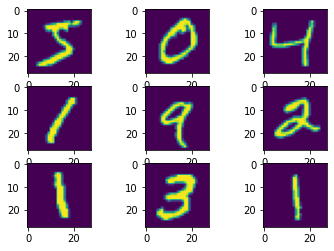

In [12]:
for i in range(9):
    #define subplot
    plt.subplot(330+1+i)
    #plot raw pixel data
    plt.imshow(x_train[i])

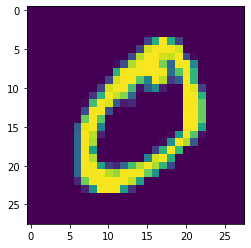

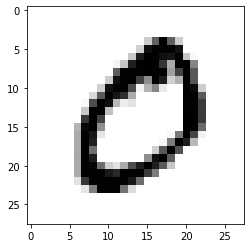

In [7]:
#to check the graph, how data looks like
plt.imshow(x_train[1])
plt.show() #in order  to excute the graph
#however we dont know whether it's color image or binary images
#so inorder to plot it change the configuration
plt.imshow(x_train[1],cmap=plt.cm.binary)


# Checking the values of each pixel
         Before Normalization

In [8]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

# As images are Gray level(1-->0 to 255) ,not colored (GRB)
     Normalizing the data

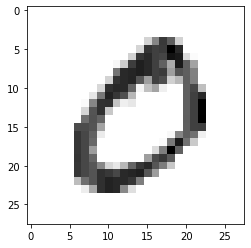

In [9]:
# we might have noticed that ,it's gray image and all values varies from 0 to 255
# in order to normlize it
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[1],cmap=plt.cm.binary)

# After normalization 

In [10]:
print(x_train[1]) #we can see all values are  normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[1]) #  to the check that we have labels inside our network

0


# Resizing image to make it suitable for apply Convolution operation

In [12]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimention kernel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)


Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
  Training on 60,000 samples of MNISThandwritten dataset

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
#Creating a neural network
model=Sequential()

# first Convolution layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(32))
model.add(Activation("relu"))


model.add(Dense(10))
model.add(Activation("softmax"))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)         

In [24]:
print("Total training samples= ",len(x_trainr))

Total training samples=  60000


In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [26]:
model.fit(x_trainr, y_train,epochs=5, validation_split = 0.3 ) #training my model

Epoch 1/5
1313/1313 [==============================] - 81s 61ms/step - loss: 0.3516 - accuracy: 0.8886 - val_loss: 0.1472 - val_accuracy: 0.9542
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.1132 - val_accuracy: 0.9658
Epoch 3/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 4/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0694 - val_accuracy: 0.9777
Epoch 5/5
1313/1313 [==============================] - 74s 57ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0628 - val_accuracy: 0.9808


In [27]:
# Evaluating on testing data set
test_loss,test_acc=model.evaluate(x_testr,y_test)
print('Test loss on 10,000 test samples',test_loss)
print('validation accuracy on 10,000 test samples',test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0581 - accuracy: 0.9830
Test loss on 10,000 test samples 0.05814588442444801
validation accuracy on 10,000 test samples 0.9829999804496765


In [28]:
#there is specialised method for efficently saving model,to name all inputs
#only for predictions iam using simple model
predictions=model.predict([x_testr])

In [29]:
print(predictions) #actually these preditions are based an one hot encodeing so these are only arrays,containing sofmax 

[[1.9533033e-08 9.5563166e-07 5.1850593e-06 ... 9.9998367e-01
  7.4919802e-07 6.9161456e-06]
 [1.4053683e-03 1.8042763e-06 9.9767607e-01 ... 2.9993555e-06
  7.0640446e-05 4.1159510e-05]
 [5.6963245e-07 9.9999464e-01 1.0908244e-07 ... 8.7065405e-07
  1.1374665e-06 2.6265874e-07]
 ...
 [8.5722618e-10 1.4510080e-07 2.7261096e-09 ... 3.3108483e-06
  1.5330691e-06 1.7574755e-05]
 [5.8333212e-06 5.5938671e-09 2.0266515e-10 ... 4.8572882e-11
  1.8067297e-03 9.2420159e-06]
 [2.4617545e-06 6.7100508e-08 2.1373523e-07 ... 2.0375921e-09
  2.6397238e-05 5.4521564e-07]]


In [30]:
#in order to understand ,convert the predictions from one hot encoding,we need to use numpy for that
print(np.argmax(predictions[0])) #so actually argmax will return the maximum value index and find the value of it

7


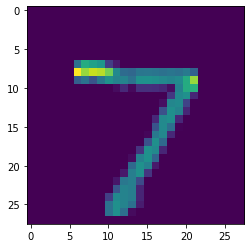

In [31]:
#now to check that is our answer is true or not
plt.imshow(x_test[0])

In [32]:
print(np.argmax(predictions[123]))

6


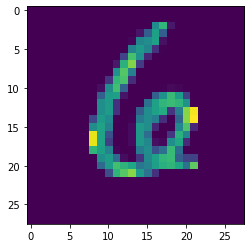

In [33]:
plt.imshow(x_test[123])

In [7]:
#Trying with one hot encoding
#reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
x_train.max()   #0- 255
x_train.min()

0

In [10]:
x_train = x_train/255
x_test=x_test/255

In [14]:

from keras.utils.np_utils import to_categorical

y_train_one_hot= to_categorical(y_train,10)
y_test_one_hot= to_categorical(y_test,10)

In [15]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(60000, 10)
(10000, 10)


In [16]:
#print the new label
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
#build the CNN model
model=Sequential()

#add model layers

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2))) #down sampling
model.add(Dropout(0.25))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

In [18]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#train the model
history = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=5, batch_size=10, verbose=1)
print(history.history.keys())

Epoch 1/5
6000/6000 [==============================] - 160s 27ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 2/5
6000/6000 [==============================] - 164s 27ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 3/5
6000/6000 [==============================] - 161s 27ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0224 - val_accuracy: 0.9933
Epoch 4/5
6000/6000 [==============================] - 163s 27ms/step - loss: 0.0551 - accuracy: 0.9840 - val_loss: 0.0266 - val_accuracy: 0.9917
Epoch 5/5
6000/6000 [==============================] - 164s 27ms/step - loss: 0.0507 - accuracy: 0.9854 - val_loss: 0.0258 - val_accuracy: 0.9924
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


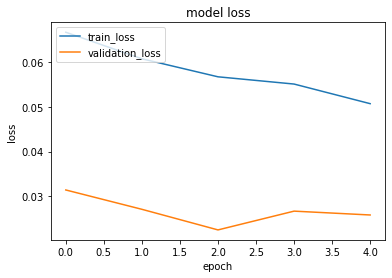

In [21]:
#visualize the models loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

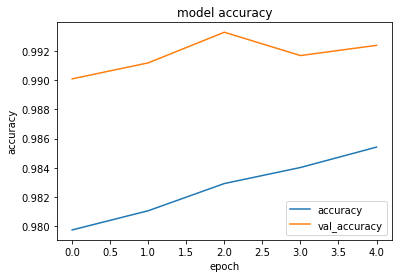

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [23]:
#show predictions as probablities for the first 4 images in the test set
predictions= model.predict(x_test[:4])
predictions

array([[3.1415929e-12, 9.0172341e-07, 1.7594522e-07, 4.6883496e-08,
        1.6455324e-09, 1.1855705e-11, 2.1527781e-14, 9.9999881e-01,
        5.3325094e-10, 1.7041864e-07],
       [2.4462758e-09, 8.6028872e-11, 1.0000000e+00, 3.2418287e-12,
        7.0098590e-14, 5.8860538e-17, 1.7143181e-10, 1.1525720e-12,
        1.1088406e-12, 1.9786806e-15],
       [6.0128919e-08, 9.9998355e-01, 1.1586769e-07, 2.1194796e-10,
        1.5061474e-06, 8.6723520e-07, 1.3288619e-05, 2.9320944e-07,
        3.0225218e-07, 1.0132385e-08],
       [9.9999189e-01, 8.3381045e-11, 6.1279998e-10, 6.4022468e-11,
        6.5647057e-11, 2.1400655e-09, 8.0523077e-06, 3.6016748e-10,
        1.8609114e-08, 2.4353575e-09]], dtype=float32)

In [26]:
#print our predictions as number labels for the first 4 images
print(np.argmax(predictions, axis=1))
#print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


In [27]:
# evaluate the model
model.evaluate(x_test,y_test_one_hot)

313/313 [==============================] - 6s 17ms/step - loss: 0.0258 - accuracy: 0.9924


[0.025781219825148582, 0.9923999905586243]

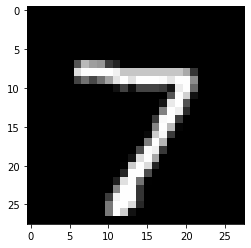

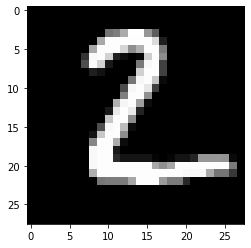

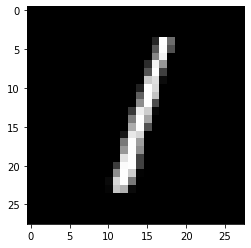

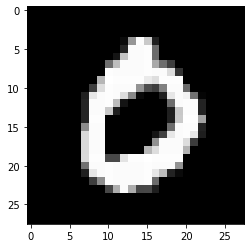

In [31]:
#show the first 4 images as pictures
for i in range(0,4):
    image = x_test[i]
    image = np.array(image, dtype='float')
    pixels= image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# Using logestic regression

In [32]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [33]:
mnist=fetch_openml('mnist_784') #784 (input layers) features in each image
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [34]:
x_train, x_test, y_train, y_test=train_test_split(mnist.data,mnist.target, test_size=0.2)

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
score=model.score(x_test,y_test)
print(score)

0.9214285714285714


D:\datascience\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
model.predict([x_test[3]])[0]

'7'

prediction:7


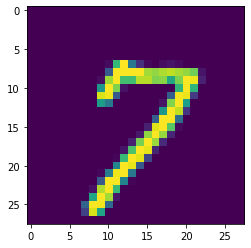

In [38]:
index=3
plt.imshow(np.reshape(x_test[index],(28,28)))
print("prediction:"+model.predict([x_test[index]])[0])


In [39]:
cm=metrics.confusion_matrix(y_test,predictions)
cm

array([[1331,    0,    3,    0,    4,   15,    6,    2,    8,    1],
       [   0, 1582,    4,    4,    2,    5,    2,    3,   17,    1],
       [   4,   13, 1219,   19,   12,    9,   13,   15,   32,    7],
       [   5,    4,   35, 1290,    1,   44,    5,   17,   32,   11],
       [   4,    9,   10,    1, 1276,    1,   14,    5,    9,   53],
       [  18,    4,   14,   37,   20, 1091,   26,    8,   32,   15],
       [  13,    3,   11,    1,   12,   16, 1396,    1,    5,    0],
       [   5,    7,   27,    7,   12,    0,    0, 1318,    4,   43],
       [   6,   29,   16,   31,    7,   42,   10,    5, 1136,   21],
       [   2,    8,    3,   20,   28,    7,    1,   50,   12, 1261]],
      dtype=int64)

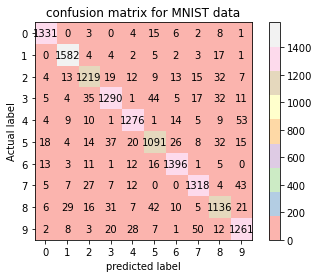

In [44]:
# plt.figure(figsize=(10,10))
plt.imshow(cm,cmap='Pastel1')
plt.title('confusion matrix for MNIST data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.colorbar()

plt.xlabel("predicted label")
plt.ylabel("Actual label")

width,height=cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment="center",verticalalignment="center")

# Using ANN

In [14]:

model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
#compiling model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [18]:

model.fit(x_trainr, y_train,validation_split=0.3,epochs=10,  ) #training my model

Epoch 1/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0181 - val_accuracy: 0.9943
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0343 - val_accuracy: 0.9903
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0226 - val_accuracy: 0.9932
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0400 - val_accuracy: 0.9901
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0364 - val_accuracy: 0.9908
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0308 - val_accuracy:

In [19]:
# Evaluateing on testing data set
test_loss,test_acc=model.evaluate(x_testr,y_test)
print('Test loss on 10,000 test samples',test_loss)
print('validation accuracy on 10,000 test samples',test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.9793
Test loss on 10,000 test samples 0.1413029283285141
validation accuracy on 10,000 test samples 0.9793000221252441


In [20]:
#predicting first 10 test images
pred=model.predict(x_testr[:10])
#print(pred)
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


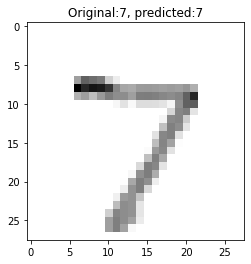

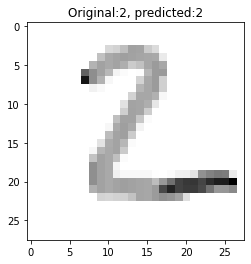

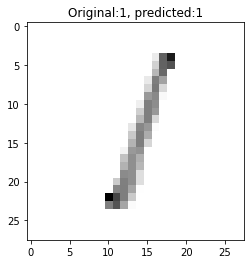

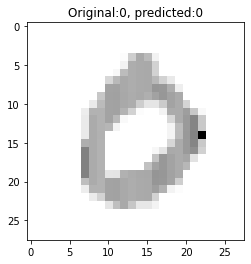

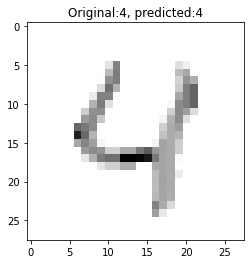

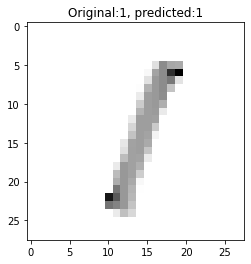

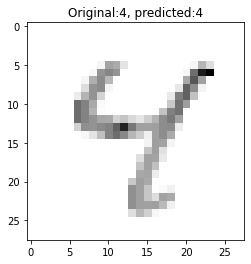

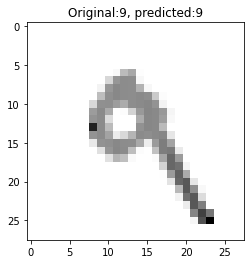

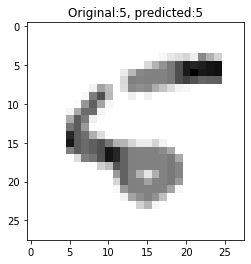

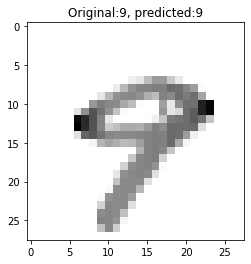

<Figure size 432x288 with 0 Axes>

In [21]:
for i in range(10):
    plt.imshow(x_test[i],cmap='binary')
    plt.title("Original:{}, predicted:{}".format(y_test[i],p[i]))
    plt.figure()

# Conclusion
Handwritten Digit Recognition is an intersting machine learning problem in which we have to idetify the handwritten digits through various classification algorithms,including deeplearing Convolution neural networks(CNN),Artificial neural networks(ANN),Logistic regression from the sklearn library.These are some of the basic classification algorithms to get started with handwritten digit recognition.


In terms of accuracy score,the CNN and ANN was the most accurate,whereas Logistic Regression were the learst compared to CNN and ANN.